In [94]:

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# Data Manipulation
import pandas as pd
import numpy as np

# Statistics
from scipy import stats
from scipy.stats import chi2_contingency

# Additional libraries for similar functionality
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.stats.weightstats import DescrStatsW


#### A data set was analyize via SQL and new columns where added to help in the analysis
#### + Using this new dataset the Python Data Analysis will start

### Starting with EDA

In [95]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset_update.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,BMI Score,Daily Steps Score,Blood Pressure Category,Blood Pressure Score
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126,83,3,1,Hypertensive Crisis,4
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80,2,4,Elevated,2
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80,2,4,Elevated,2
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,4,1,Hypertensive Crisis,4
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,4,1,Hypertensive Crisis,4


- **Person ID**: A unique identifier for each individual in the dataset.
- **Gender**: The gender of the individual
- **Age**: The age of the individual
- **Occupation**: The person's job or profession, which can affect various aspects of health, such as stress levels and physical activity.
- **Sleep Duration**: The average time the individual sleeps, measured in hours.
- **Quality of Sleep**: Quality of sleep from 1 to 10, 1 being the worst and 10 the best.
- **Physical Activity Level**: The level physical activity the person engages in, which can range 1 to 100.
- **Stress Level**: An assessment of the individual’s stress, from 1 to 10.
- **BMI Category**: The classification of the individual’s Body Mass Index (BMI) into categories such as underweight, normal, normal weight, overweight, or obese.
- **Blood Pressure**: The measure of the force of blood against the walls of the arteries, typically recorded as systolic/diastolic values.
- **Heart Rate**: The number of heartbeats per minute, an important indicator of cardiovascular health.
- **Daily Steps**: The number of steps an individual takes in a day, often measured by pedometers or fitness trackers.
- **Sleep Disorder**: Any condition or issue related to sleep, such as insomnia or sleep apnea, that affects the individual’s sleep quality.
- **Systolic**: The higher value in a blood pressure reading, representing the pressure in the arteries when the heart beats.
- **Diastolic**: The lower value in a blood pressure reading, representing the pressure in the arteries when the heart is at rest between beats.
- **BMI Score**: A numerical value calculated from a person’s height and weight to assess whether they are underweight, normal, normal weight, overweight, or obese.


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
 13  Systolic                 374 non-null    int64  
 14  Diastolic                3

In [97]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Systolic                   0
Diastolic                  0
BMI Score                  0
Daily Steps Score          0
Blood Pressure Category    0
Blood Pressure Score       0
dtype: int64

In [98]:
gender_numbers = data.groupby('Gender').size()
gender_numbers

Gender
Female    185
Male      189
dtype: int64

From this Number we can see the split is almost igual which can give us the insight for the Sleep Health in both genders

Text(0, 0.5, '')

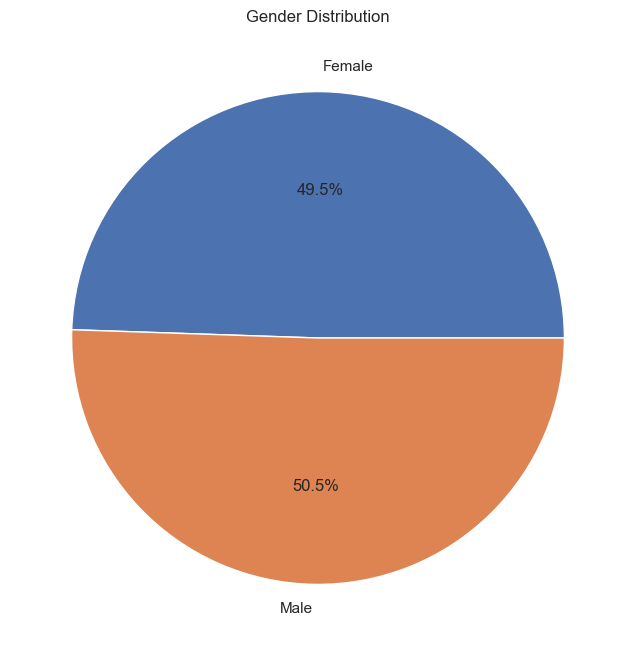

In [99]:
sns.set(style='whitegrid')

# Create a bar plot
gender_numbers.plot(kind= 'pie' , figsize=(12,8), autopct='%1.1f%%')

# Add titles and labels
plt.title('Gender Distribution')

# Remove the ylabel 
plt.ylabel('')


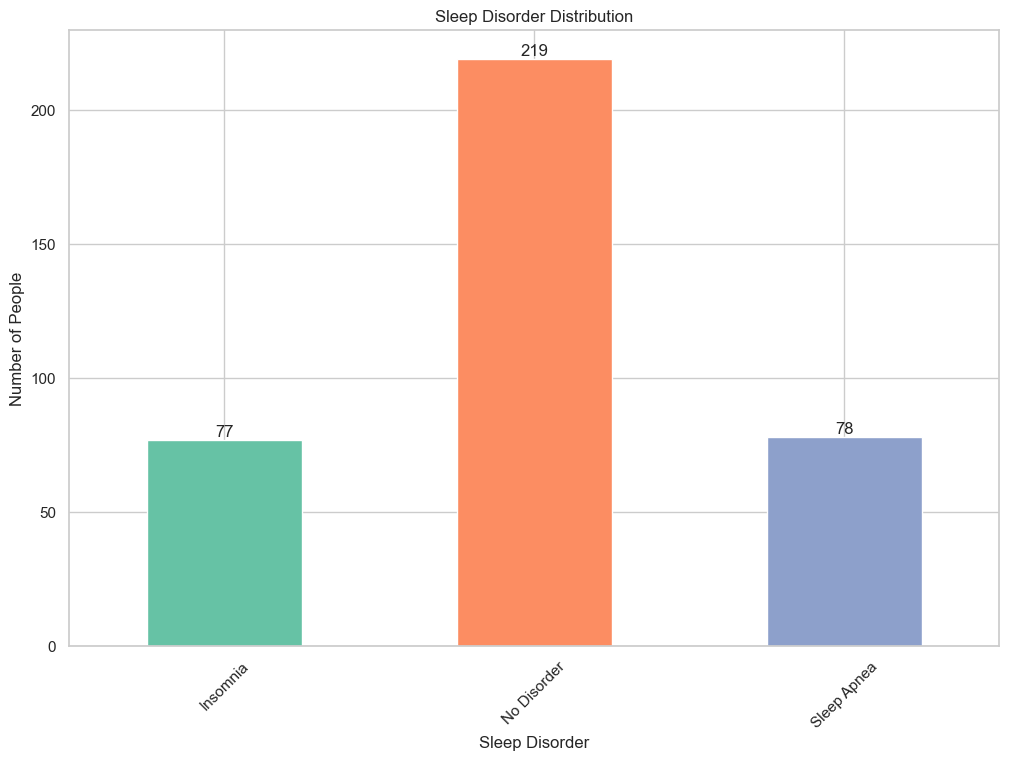

In [100]:
sleep_disorder = data.groupby('Sleep Disorder').size()
sleep_disorder

#creating the graph
sns.set(style='whitegrid')

# Create a list of colors (you can customize this list or use matplotlib's color palette)
colors = sns.color_palette("Set2", len(sleep_disorder))

# Create a bar plot
sleep_disorder.plot(kind= 'bar' , figsize=(12,8), color = colors)

# Add titles and labels
plt.title('Sleep Disorder Distribution')
plt.ylabel('Number of People')
plt.xlabel('Sleep Disorder')
plt.xticks(rotation=45)

# Display the count values on top of the bars
for i, v in enumerate(sleep_disorder):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=12)

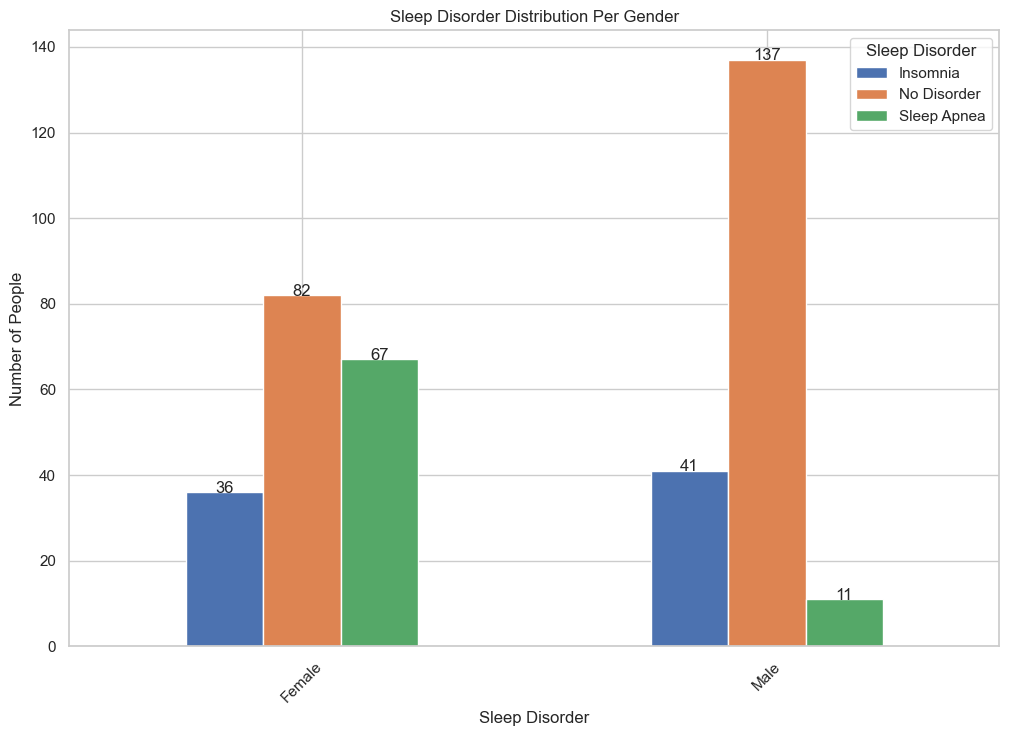

In [101]:
sleep_disorder_gender = data.groupby(['Gender', 'Sleep Disorder']).size().unstack()
sleep_disorder_gender


sns.set(style='whitegrid')

sdg = sleep_disorder_gender.plot(kind='bar', figsize=(12,8))

# Add titles and labels
plt.title('Sleep Disorder Distribution Per Gender')
plt.ylabel('Number of People')
plt.xlabel('Sleep Disorder')
plt.xticks(rotation=45)

# Display the count values on top of the bars
# Display the count values on top of the bars
for p in sdg.patches:
    sdg.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, 
                xytext=(0, 3), textcoords='offset points') 


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(Female, Normal)'),
  Text(1, 0, '(Female, Normal Weight)'),
  Text(2, 0, '(Female, Obese)'),
  Text(3, 0, '(Female, Overweight)'),
  Text(4, 0, '(Male, Normal)'),
  Text(5, 0, '(Male, Normal Weight)'),
  Text(6, 0, '(Male, Obese)'),
  Text(7, 0, '(Male, Overweight)')])

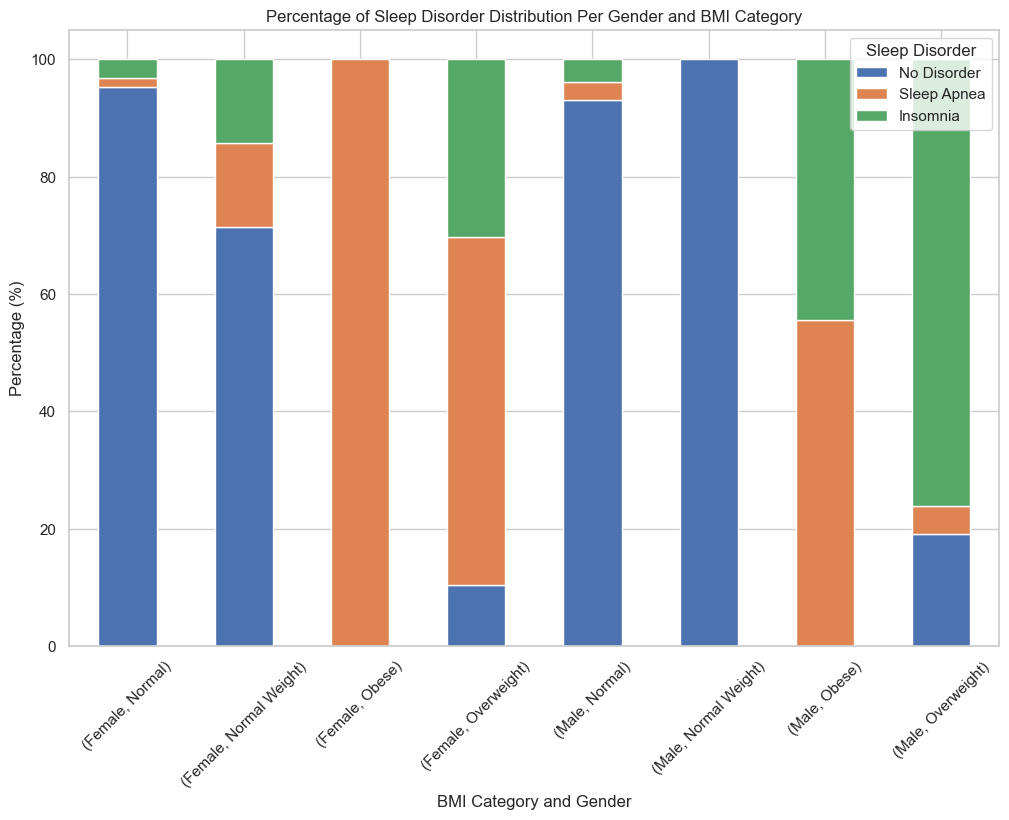

In [102]:
gender_bmi_disorder = data.groupby(['Gender', "BMI Category", 'Sleep Disorder']).size().unstack()
gender_bmi_disorder

# Normalize to calculate the percentage within each group
gender_bmi_disorder_percentage = gender_bmi_disorder.div(gender_bmi_disorder.sum(axis=1), axis=0) * 100

# Check the column names to confirm the correct category names
gender_bmi_disorder_percentage.columns

# Reorder the columns so that 'No Disorder' is at the bottom
ordered_columns = ['No Disorder', 'Sleep Apnea', 'Insomnia']

# Reorder the columns
gender_bmi_disorder_percentage = gender_bmi_disorder_percentage[ordered_columns]

# Create a stacked bar chart for percentages
ax = gender_bmi_disorder_percentage.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add titles and labels
plt.title('Percentage of Sleep Disorder Distribution Per Gender and BMI Category')
plt.ylabel('Percentage (%)')
plt.xlabel('BMI Category and Gender')
plt.xticks(rotation=45)


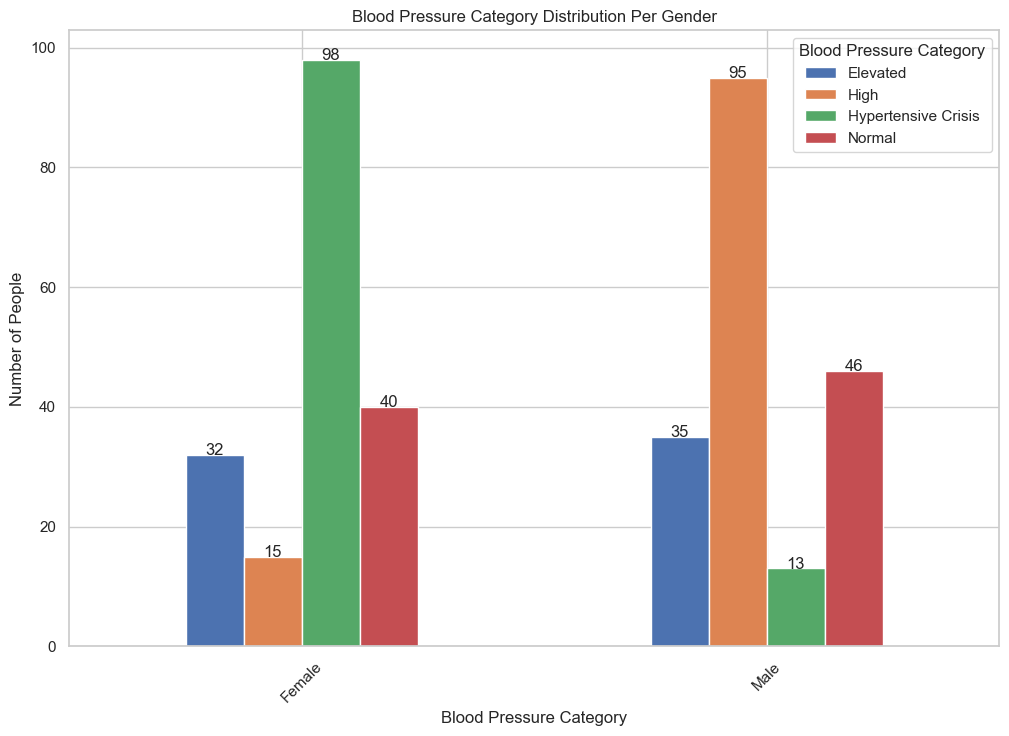

In [103]:
bb_gender = data.groupby(['Gender', 'Blood Pressure Category']).size().unstack()
bb_gender


sns.set(style='whitegrid')

bbg = bb_gender.plot(kind='bar', figsize=(12,8))

# Add titles and labels
plt.title('Blood Pressure Category Distribution Per Gender')
plt.ylabel('Number of People')
plt.xlabel('Blood Pressure Category')
plt.xticks(rotation=45)

# Display the count values on top of the bars
# Display the count values on top of the bars
for p in bbg.patches:
    bbg.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, 
                xytext=(0, 3), textcoords='offset points') 

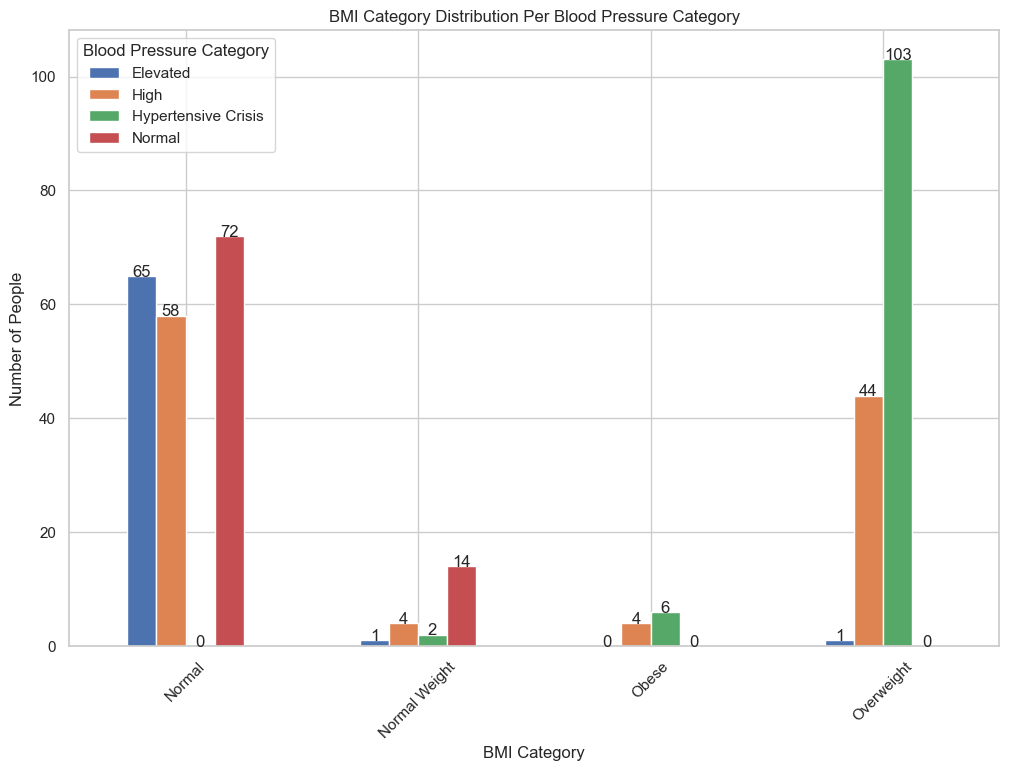

In [106]:
bb_bmi = data.groupby(['BMI Category', 'Blood Pressure Category']).size().unstack()
bb_bmi


sns.set(style='whitegrid')

bbbmi = bb_bmi.plot(kind='bar', figsize=(12,8))

# Add titles and labels
plt.title('BMI Category Distribution Per Blood Pressure Category')
plt.ylabel('Number of People')
plt.xlabel('BMI Category')
plt.xticks(rotation=45)

# Display the count values on top of the bars
# Display the count values on top of the bars
for p in bbbmi.patches:
    bbbmi.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, 
                xytext=(0, 3), textcoords='offset points') 